In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [125]:
# read data 
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [126]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [127]:
df.shape

(569, 32)

In [128]:
# this data is 569 data points and 32 features

In [129]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [130]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [131]:
# this data has no null or missing values.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [133]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [134]:
df.describe(include='O')

,diagnosis
count,569
unique,2
top,B
freq,357


In [135]:
# we have B=357 and M =212 this data isnt baised 

In [136]:
# we will use KNN algorthim so we must first preprocess our data so let's start
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()  
df['diagnosis']= label_encoder.fit_transform(df['diagnosis']) 

In [137]:
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [138]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scale = scaler.fit_transform(df) 
print(scale)

[[-0.23640517  1.29767572  1.09706398 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.29767572  1.82982061 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.29767572  1.57988811 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  1.29767572  0.70228425 ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.29767572  1.83834103 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -0.77060855 -1.80840125 ... -1.74506282 -0.04813821
  -0.75120669]]


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X=df.drop(columns=['diagnosis','id'],axis=1)
y=df['diagnosis']

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [142]:
from sklearn.neighbors import KNeighborsClassifier 


In [143]:
training_accuracy=[]
testing_accuracy=[]
n=range(1,11)
for i in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    testing_accuracy.append(clf.score(X_test,y_test))
    training_accuracy.append(clf.score(X_train,y_train))
    
for i in range(0,10):
    print("when the number of  k was "+str(i+1))
    print("the accuracy of testing was "+str(testing_accuracy[i]))
    print("the accuracy of trainning was "+ str(training_accuracy[i]))


when the number of  k was 1
the accuracy of testing was 0.9300699300699301
the accuracy of trainning was 1.0
when the number of  k was 2
the accuracy of testing was 0.9440559440559441
the accuracy of trainning was 0.9366197183098591
when the number of  k was 3
the accuracy of testing was 0.9300699300699301
the accuracy of trainning was 0.9507042253521126
when the number of  k was 4
the accuracy of testing was 0.951048951048951
the accuracy of trainning was 0.9366197183098591
when the number of  k was 5
the accuracy of testing was 0.965034965034965
the accuracy of trainning was 0.9342723004694836
when the number of  k was 6
the accuracy of testing was 0.951048951048951
the accuracy of trainning was 0.9295774647887324
when the number of  k was 7
the accuracy of testing was 0.958041958041958
the accuracy of trainning was 0.9366197183098591
when the number of  k was 8
the accuracy of testing was 0.958041958041958
the accuracy of trainning was 0.9342723004694836
when the number of  k was 9


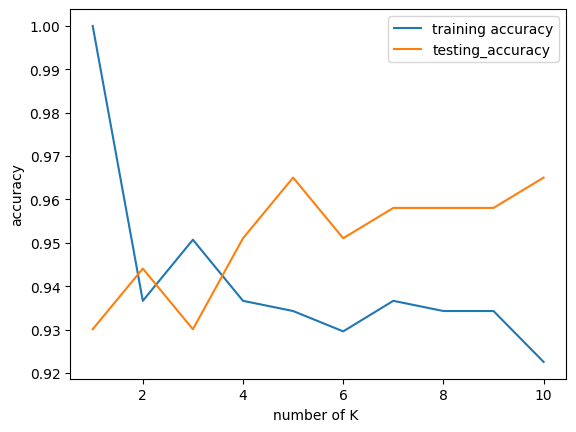

In [144]:
import matplotlib.pyplot as plt
plt.plot(n,training_accuracy,label="training accuracy")
plt.plot(n,testing_accuracy,label="testing_accuracy")
plt.ylabel("accuracy")
plt.xlabel("number of K ")
plt.legend()

In [149]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print("the train score",clf.score(X_train,y_train))
print("the test score",clf.score(X_test,y_test))

the train score 0.9507042253521126
the test score 0.9300699300699301
